# MMF Colab Demo

This notebook provides step-by-step instructions on how to use MMF to build new models and uses the Hateful Memes (HM) dataset for this specific tutorial.

Follow these links to learn more about MMF:
- [MMF Blog Post]()
- [GitHub repo](https://github.com/facebookresearch/mmf)
- [Website](https://mmf.sh) and [Documentation](https://mmf.rtfd.io)

In general, the notebook demonstrates how to:

1. [Download MMF](#scrollTo=l7Eo9ZqTDW3I)
2. [Download the HM dataset](#scrollTo=nYyXt9dzEBEU&line=12&uniqifier=1)
3. [Test pretrained models on HM](#scrollTo=nYyXt9dzEBEU&line=12&uniqifier=1)
4. [Submit a prediction](#scrollTo=uhKvYHtWHlyr&line=3&uniqifier=1)
5. [Train existing model on HM](#scrollTo=) 
6. [Build your model](#scrollTo=)
7. [Train your model on HM](#scrollTo=) 

In [13]:
!pip uninstall pandas

^C


In [1]:
import torch                    
import torchvision
import fasttext

ModuleNotFoundError: No module named 'torchvision'

In [3]:
%matplotlib inline

import json
import logging
from pathlib import Path
import random
import tarfile
import tempfile
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_path  # Path style access for pandas
from tqdm import tqdm

ModuleNotFoundError: No module named 'pandas'

In [13]:
!pip3 install -e facebookresearch-mmf-47ee79b

^C


In [ ]:
# git clone https://github.com/facebookresearch/mmf.git
# cd mmf
# pip install --editable .

In [12]:
# !pip install mmf@https://github.com/facebookresearch/mmf/tarball/master

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Cloning https://github.com/PyTorchLightning/pytorch-lightning (to revision 9b011606f) to c:\users\avije\appdata\local\temp\pip-install-6htd_epa\pytorch-lightning_e113a572c1ec497587e4e967cd47a337


  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning 'C:\Users\avije\AppData\Local\Temp\pip-install-6htd_epa\pytorch-lightning_e113a572c1ec497587e4e967cd47a337'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/PyTorchLightning/pytorch-lightning 'C:\Users\avije\AppData\Local\Temp\pip-install-6htd_epa\pytorch-lightning_e113a572c1ec497587e4e967cd47a337'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


## Download dataset

We will now download the Hateful Memes dataset. You will require two things to download the datasets: (i) URL (ii) Password to the zip file. To get both of these follow these steps:

1. Go to [DrivenData challenge page](https://www.drivendata.org/competitions/64/hateful-memes/)
2. Register, read and acknowledge the agreements for data access.
3. Go to the [data page](https://www.drivendata.org/competitions/64/hateful-memes/data), right click on the "Hateful Memes challenge dataset" link and "Copy Link Address" as shown in the image. This will copy the URL for the zip file to your clipboard which you will use in the next step.
![data](https://i.imgur.com/JQx2hPm.png)
4. Also, note the password provided in the description.
5. Run the next code block, fill in the URL and the zipfile's password when prompted.

The code blocks after that will download, convert and visualize the dataset.

In [2]:
from getpass import getpass, getuser
url = getpass("Enter the Hateful Memes data URL:")
password = getpass("Enter ZIP file's Password:")

Enter the Hateful Memes data URL:········
Enter ZIP file's Password:········


This will actually download the data.

In [3]:
!curl -o hateful_memes.zip "$url" -H 'Referer: hateful_memes.zip' --compressed

curl: option --compressed: the installed libcurl version doesn't support this
curl: try 'curl --help' for more information


The next command will convert the zip file into required MMF format.

In [12]:
!mmf_convert_hm --zip_file hateful_memes.zip --password $password --bypass_checksum=1

D:\Download\Programs\newConda\envs\DLproject\lib\site-packages\torchaudio\backend\utils.py:67: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')
Traceback (most recent call last):
  File "D:\Download\Programs\newConda\envs\DLproject\lib\site-packages\pkg_resources\__init__.py", line 568, in _build_master
    ws.require(__requires__)
  File "D:\Download\Programs\newConda\envs\DLproject\lib\site-packages\pkg_resources\__init__.py", line 886, in require
    needed = self.resolve(parse_requirements(requirements))
  File "D:\Download\Programs\newConda\envs\DLproject\lib\site-packages\pkg_resources\__init__.py", line 777, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pkg_resources.ContextualVersionConflict: (matplotlib 3.5.1 (d:\download\programs\newconda\envs\dlproject\lib\site-packages), Requirement.parse('matplotlib==3.3.4'), {'mmf'})

During handling of the above exception, another exception occurred:

Traceback (m

In [ ]:
python -m site --user-site

In [8]:
path = r'C:\Users\avije/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes'

import os
  
dir_list = os.listdir(path)
dir_list

['.DS_Store',
 'dev_seen.jsonl',
 'dev_unseen.jsonl',
 'img',
 'LICENSE.txt',
 'README.md',
 'test_seen.jsonl',
 'test_unseen.jsonl',
 'train.jsonl']

### Visualize

The next code block will output some samples of the dataset for visualization. You can adjust number of samples, rows and size among other stuff. 

**Note 1:** In some particular images, colab version of matplotlib can cause issues, so we will upgrade it and restart the runtime to load new version.

**Note 2:** *Some of the images in the hateful memes dataset are sensitive and may not be suitable for all audiences. Please run the next code responsibly keeping these conditions in mind.*

In [10]:
!pip install --upgrade matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmf 1.0.0rc12 requires matplotlib==3.3.4, but you have matplotlib 3.5.1 which is incompatible.



  Using cached matplotlib-3.5.1-cp37-cp37m-win_amd64.whl (7.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


In [11]:
from mmf.common.registry import registry
from mmf.models.mmbt import MMBT
from mmf.utils.build import build_dataset
from mmf.utils.env import setup_imports

setup_imports()
dataset = build_dataset("hateful_memes")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)
dataset.visualize(num_samples=8, size=(512, 512), nrow=4)

ModuleNotFoundError: No module named 'mmf'

## Test pretrained model

We will now use MMF to load an existing model MMBT to run some tests on random images from the internet. Fill in the image url and the text contained in it to see if the model thinks of it as hateful or not.

In [31]:
import matplotlib.pyplot as plt
import requests

from PIL import Image

from mmf.models.mmbt import MMBT

model = MMBT.from_pretrained("mmbt.hateful_memes.images")

[ Downloading: https://dl.fbaipublicfiles.com/mmf/data/models/mmbt/mmbt.finetuned.hateful_memes_images_2020_08_20.tar.gz to /root/.cache/torch/mmf/data/models/mmbt.hateful_memes.images/mmbt.finetuned.hateful_memes_images.tar.gz ]


[ Starting checksum for mmbt.finetuned.hateful_memes_images.tar.gz]
[ Checksum successful for mmbt.finetuned.hateful_memes_images.tar.gz]
Unpacking mmbt.finetuned.hateful_memes_images.tar.gz


https://huggingface.co/bert-base-uncased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmptn4rxtno


storing https://huggingface.co/bert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
creating metadata file for /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range":

storing https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
creating metadata file for /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModelJit: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModelJit from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModelJit from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of BertModelJit were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of 

Missing keys ['model.bert.mmbt.transformer.embeddings.position_ids'] in the checkpoint.
If this is not your checkpoint, please open up an issue on MMF GitHub. 
Unexpected keys if any: []
https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpojzfna1m


storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
creating metadata file for /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a1a15e79
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializ

storing https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
creating metadata file for /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpdzp1kdei


storing https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json in cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
creating metadata file for /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4


loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

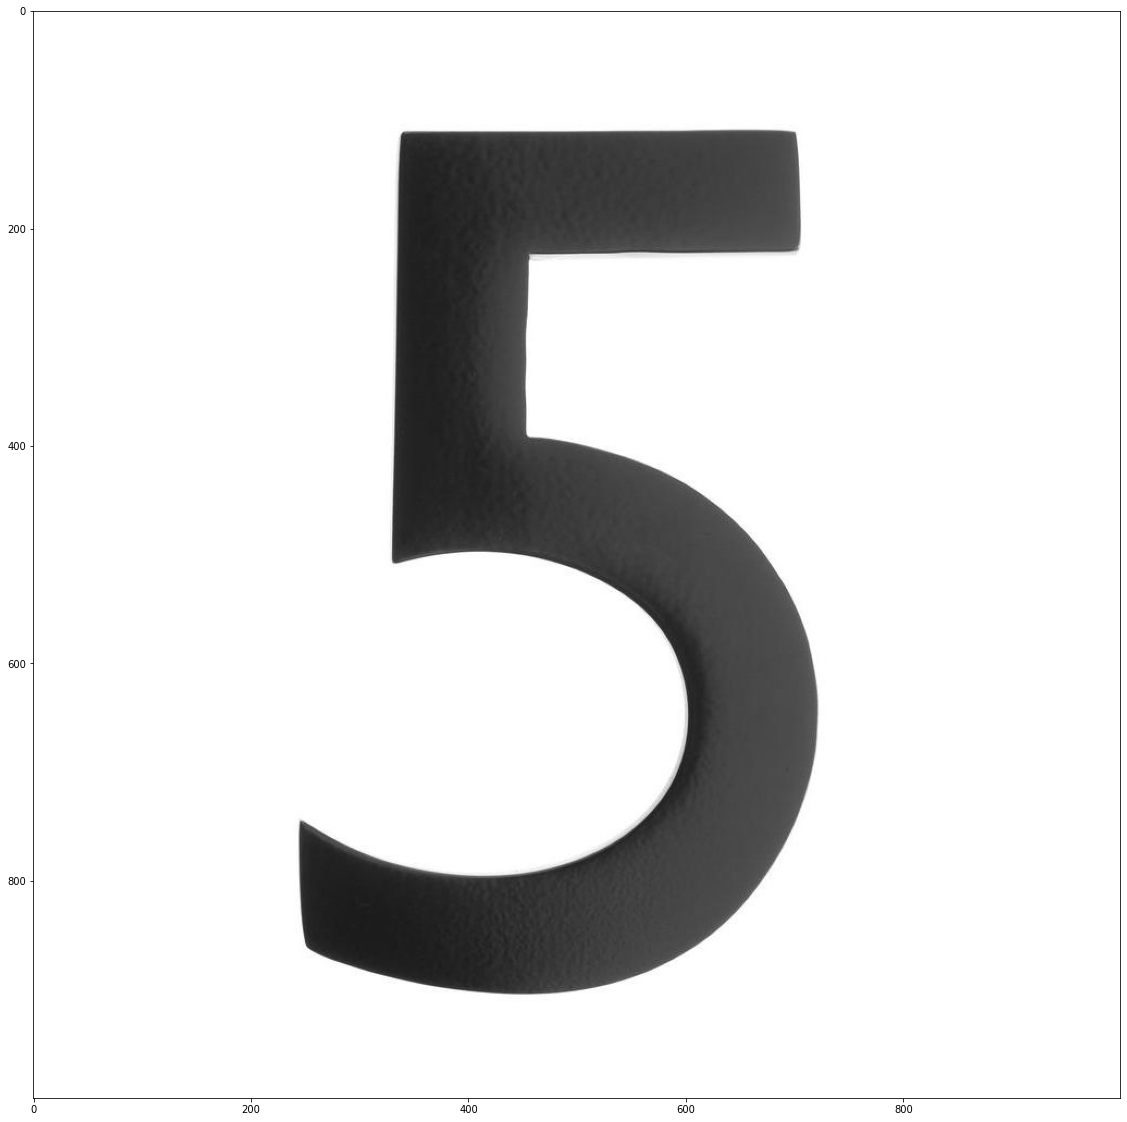

In [43]:
import os
from PIL import Image
image_url = "https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg" #@param {type:"string"}
plt.imshow(Image.open(requests.get(image_url, stream=True).raw))



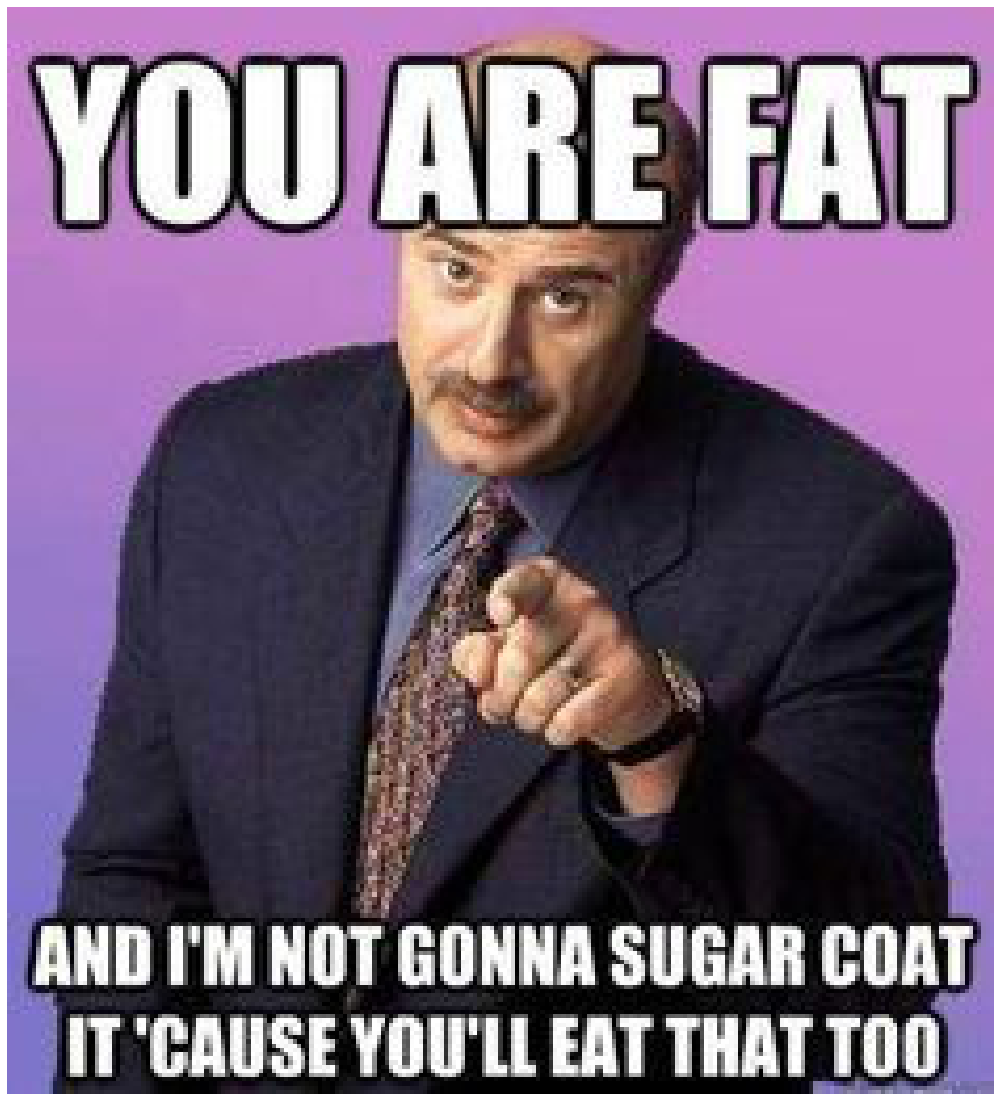

Hateful as per the model? Yes
Model's confidence: 95.448%


In [48]:
image_url = "https://i.pinimg.com/236x/44/56/5f/44565f4e2ebcadc13852859cf9a903a5.jpg" #@param {type:"string"}
text = "You are fat and I am gonna sugar coat it cause you will eat that too" #@param {type: "string"}
output = model.classify(image_url, text)
plt.imshow(Image.open(requests.get(image_url, stream=True).raw))
plt.axis("off")
plt.show()
hateful = "Yes" if output["label"] == 1 else "No"
print("Hateful as per the model?", hateful)
print(f"Model's confidence: {output['confidence'] * 100:.3f}%")

## Submit a prediction

Now, we will use a pretrained model from MMF to submit a prediction to DrivenData. Run the command in the next block and at the end it will output the path to the csv file generated. Download and upload that file to [DrivenData's submission page](https://www.drivendata.org/competitions/64/hateful-memes/submissions/).

In [55]:
!mmf_predict config=projects/hateful_memes/configs/mmbt/defaults.yaml \
model=mmbt \ 
dataset=hateful_memes \
run_type = test \ 
checkpoint.resume_zoo=mmbt.hateful_memes.images \
training.batch_size=16

SyntaxError: ignored

## Train an existing model

We will use MMF to train an existing baseline from MMF's model zoo on the Hateful Memes dataset. Run the next code cell to start training MMBT-Grid model on the dataset. You can adjust the batch size, maximum number of updates, log and evaluation interval among other things by using command line overrides. Read more about MMF's configuration system at https://mmf.readthedocs.io/en/latest/notes/configuration.html.

In [56]:
!mmf_run config=projects/hateful_memes/configs/mmbt/defaults.yaml \
  model=mmbt \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

/usr/local/lib/python3.7/dist-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_USER_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/omegaconf/resolvers/__init__.py:13: UserWarning: The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573
  "The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573"
2022-04-07T02:21:26 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/mmbt/defaults.yaml
2022-04-07T02:21:26 | mmf.utils.configuration: Overriding option model to mmbt
2022-04-07T02:21:26 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-04-07T02:21:26 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-04-07T02:21:26 | mmf.utils.configuration: Overriding option training.ma

## Build your own model

Using MMF's encoders, modules and utilities, we can easily build a custom model. In this example, we are building a fusion model which fuses ResNet pooled grid features with fasttext embedding vectors to classify a meme as hateful or not hateful. 

Steps involved in building the model are:

1. Create a new processor to get fasttext sentence embeddings. (Read more on processors [here]())
2. Create new model using encoders from MMF.
3. Move hardcoded stuff from model to configuration.

In [ ]:
import torch 

# We will inherit the FastText Processor already present in MMF
from mmf.datasets.processors import FastTextProcessor
# registry is needed to register processor and model to be MMF discoverable
from mmf.common.registry import registry


# Register the processor so that MMF can discover it
@registry.register_processor("fasttext_sentence_vector")
class FastTextSentenceVectorProcessor(FastTextProcessor):
    # Override the call method
    def __call__(self, item):
        # This function is present in FastTextProcessor class and loads
        # fasttext bin
        self._load_fasttext_model(self.model_file)
        if "text" in item:
            text = item["text"]
        elif "tokens" in item:
            text = " ".join(item["tokens"])

        # Get a sentence vector for sentence and convert it to torch tensor
        sentence_vector = torch.tensor(
            self.model.get_sentence_vector(text),
            dtype=torch.float
        )

        # Return back a dict
        return {
            "text": sentence_vector
        }
    
    # Make dataset builder happy, return a random number
    def get_vocab_size(self):
        return None

In [ ]:
import torch

# registry is need to register our new model so as to be MMF discoverable
from mmf.common.registry import registry
# All model using MMF need to inherit BaseModel
from mmf.models.base_model import BaseModel
# ProjectionEmbedding will act as proxy encoder for FastText Sentence Vector
from mmf.modules.embeddings import ProjectionEmbedding
# Builder methods for image encoder and classifier
from mmf.utils.build import build_classifier_layer, build_image_encoder

# Register the model for MMF, "concat_vl" key would be used to find the model
@registry.register_model("concat_vl")
class LanguageAndVisionConcat(BaseModel):
    # All models in MMF get first argument as config which contains all
    # of the information you stored in this model's config (hyperparameters)
    def __init__(self, config, *args, **kwargs):
        # This is not needed in most cases as it just calling parent's init
        # with same parameters. But to explain how config is initialized we 
        # have kept this
        super().__init__(config, *args, **kwargs)
    
    # This classmethod tells MMF where to look for default config of this model
    @classmethod
    def config_path(cls):
        # Relative to user dir root
        return "/content/hm_example_mmf/configs/models/concat_vl.yaml"
    
    # Each method need to define a build method where the model's modules
    # are actually build and assigned to the model
    def build(self):
        """
        Config's image_encoder attribute will used to build an MMF image
        encoder. This config in yaml will look like:

        # "type" parameter specifies the type of encoder we are using here. 
        # In this particular case, we are using resnet152
        type: resnet152
      
        # Parameters are passed to underlying encoder class by 
        # build_image_encoder
        params:
          # Specifies whether to use a pretrained version
          pretrained: true 
          # Pooling type, use max to use AdaptiveMaxPool2D
          pool_type: avg 
      
          # Number of output features from the encoder, -1 for original
          # otherwise, supports between 1 to 9
          num_output_features: 1 
        """
        self.vision_module = build_image_encoder(self.config.image_encoder)

        """
        For classifer, configuration would look like:
        # Specifies the type of the classifier, in this case mlp
        type: mlp
        # Parameter to the classifier passed through build_classifier_layer
        params:
          # Dimension of the tensor coming into the classifier
          in_dim: 512
          # Dimension of the tensor going out of the classifier
          out_dim: 2
          # Number of MLP layers in the classifier
          num_layers: 0
        """
        self.classifier = build_classifier_layer(self.config.classifier)
        
        # ProjectionEmbeddings takes in params directly as it is module
        # So, pass in kwargs, which are in_dim, out_dim and module
        # whose value would be "linear" as we want linear layer
        self.language_module = ProjectionEmbedding(
            **self.config.text_encoder.params
        )
        # Dropout value will come from config now
        self.dropout = torch.nn.Dropout(self.config.dropout)
        # Same as Projection Embedding, fusion's layer params (which are param 
        # for linear layer) will come from config now
        self.fusion = torch.nn.Linear(**self.config.fusion.params)
        self.relu = torch.nn.ReLU()

    # Each model in MMF gets a dict called sample_list which contains
    # all of the necessary information returned from the image
    def forward(self, sample_list):
        # Text input features will be in "text" key
        text = sample_list["text"]
        # Similarly, image input will be in "image" key
        image = sample_list["image"]

        text_features = self.relu(self.language_module(text))
        image_features = self.relu(self.vision_module(image))

        # Concatenate the features returned from two modality encoders
        combined = torch.cat([text_features, image_features.squeeze(dim=1)], dim=1)

        # Pass through the fusion layer, relu and dropout
        fused = self.dropout(self.relu(self.fusion(combined)))

        # Pass final tensor from classifier to get scores
        logits = self.classifier(fused)

        # For loss calculations (automatically done by MMF based on loss defined
        # in the config), we need to return a dict with "scores" key as logits
        output = {"scores": logits}

        # MMF will automatically calculate loss
        return output

Now, we will install the example repo that we have already created on top of MMF and contains code in this colab. We do this so that we don't have to build configs again from scratch

In [ ]:
!git clone https://github.com/apsdehal/hm_example_mmf /content/hm_example_mmf

## Train your model

In this step, we will train the model we just built. A dot list can be passed as either a dict or a list to the run to override the configuration parameters.

In [ ]:
import sys
from mmf_cli.run import run
from mmf.common.registry import registry

registry.mapping["state"] = {}
opts = opts=[
    "config='/content/hm_example_mmf/configs/experiments/defaults.yaml'", 
    "model=concat_vl", 
    "dataset=hateful_memes", 
    "training.num_workers=0",
]
run(opts=opts)

## Using your module

Since, we have cloned the repo that contains the example we built in this colab notebook we can use it also to run the training from command line by using the `env.user_dir` option or by overriding the environment variable `MMF_USER_DIR`. Expand the cell below the next code cell to see how it can be done.

In [ ]:
!MMF_USER_DIR="/content/hm_example_mmf" mmf_run \
  config="configs/experiments/defaults.yaml" \
  model=concat_vl \
  dataset=hateful_memes \
  training.num_workers=0

## Conclusion and Further Steps

In this colab notebook, we learned how we can use MMF to train and predict already existing models in MMF's zoo. We also learned how we can build custom models using various modules and goodies provided in MMF easily.

If you have any issues, feedback or comments, please reach us out at mmf@fb.com or open up an issue at [GitHub](https://github.com/facebookresearch/mmf/issues/new/choose). We are also accepting PRs if you want to add your cool model to MMF and we are always open to community contributions.

At Facebook AI, we’ll continuously improve and expand on the multimodal capabilities available through MMF, and we welcome contributions from the community as well to build this resource. We hope MMF will be the framework of choice and be a catalyst for research in this area by providing a powerful, versatile platform for multimodal research. 